In [51]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile
from IPython.display import Audio

In [32]:
# INFINITECLIP
# This function implements infinite clipping distortion. Amplitude values
# of the input signal that are positive are changed to 1 in the output signal.
# Amplitude values of the input signal that are negative are changed to -1 in
# the output signal.
#
# See also HARDCLIP, DISTORTIONEXAMPLE

def infiniteClip(x):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        # Change all amplitude values to +1 or -1 (FS amplitude)
        # 'Pin the Rails' (description in audio electronics)
        if x[n] >= 0:
            # If positive, assign output = 1
            y[n] = 1

        else:
            # If negative, assign output = -1
            y[n] = -1

    return y

In [4]:
# HALFWAVERECTIFICATION
# This function implements half-wave rectification distortion. Amplitude values
# of the input signal that are negative are changed to zero in the output signal.
#
# See also FULLWAVERECTIFICATION, DISTORTIONEXAMPLE

def halfWaveRectification(x):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        if x[n] >= 0:
            # If positive, assign input to output
            y[n] = x[n]

        else:
            # If negative, set output to zero
            y[n] = 0

    return y

In [7]:
# FULLWAVERECTIFICATION
# This function implements full-wave rectification distortion. Amplitude values
# of the input signal that are negative are changed to positive in the output
# signal.
#
# See also HALFWAVERECTIFICATION, DISTORTIONEXAMPLE

def fullWaveRectification(x):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        if x[n] >= 0:
            # If positive, assign input to output
            y[n] = x[n]

        else:
            # If negative, flip input
            y[n] = (-1) * x[n]

    return y

In [8]:
# HARDCLIP
# This function implements hard-clipping distortion. Amplitude values of the
# input signal that are greater than a threshold are clipped.
#
# Input variables
#   x: signal to be processed
#   thresh: maximum amplitude where clipping occurs
#
# See also INFINITECLIP, PIECEWISE, DISTORTIONEXAMPLE

def hardClipping(x, thresh):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        if x[n] >= thresh:
            # If true, assign input = thresh
            y[n] = thresh

        elif x[n] <= -thresh:
            # If true, set output = -thresh
            y[n] = -thresh

        else:
            y[n] = x[n]

    return y

In [9]:
# CUBICDISTORTION
# This function implements cubic soft-clipping distortion. An input parameter
# 'a' is used to control the amount of distortion applied to the input
# signal.
#
# Input variables
#   x: input signal
#   a: drive amount (0-1), amplitude of 3rd harmonic
#
# See also ARCTANDISTORTION, DISTORTIONEXAMPLE

def cubicDistortion(x, a):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        y[n] = x[n] - (a * (1/3) * pow(x[n], 3))

    return y

In [10]:
# ARCTANDISTORTION
# This function implements arctangent soft-clipping distortion. An input
# parameter 'alpha' is used to control the amount of distortion applied to
# the input signal.
#
# Input variables
#   x: input signal
#   alpha: drive amount (1-10)
#
# See also CUBICDISTORTION, DISTORTIONEXAMPLE

def arctanDistortion(x, alpha):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        y[n] = (2/np.pi) * np.arctan(x[n] * alpha)
    return y

In [11]:
# EXPONENTIAL
# This function implements exponential soft-clipping distortion. An input
# parameter 'drive' is used to control the amount of distortion applied to
# the input signal.
#
# Input variables
#   x: input signal
#   drive: drive amount (1-10)
#
# See also CUBICDISTORTION, ARCTANDISTORTION, DISTORTIONEXAMPLE

def exponential(x, drive):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        y[n] = np.sign(x[n]) * (1 - np.exp(-np.abs(drive * x[n])))
    return y

In [34]:
# PIECEWISE
# This function implements a piece-wise distortion algorithm. Within one
# operating region, the input signal is not distorted. When the signal is
# outside of that operating region, it is clipped.
#
# See also HARDCLIP, DISTORTIONEXAMPLE

def piecewise(x):
    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        if np.abs(x[n]) <= 1/3:
            y[n] = 2 * x[n]
        elif np.abs(x[n]) > 2/3:
            y[n] = np.sign(x[n])
        else:
            y[n] = (np.sign(x[n])) * (pow((3 - (2 - 3 * abs(x[n]))), 2)/3)

    return y


In [13]:
# DIODE
# This function implements the Shockley ideal diode equation for audio signals
# with an amplitude between -1 and 1 FS.
#
# See also ASYMMETRICAL, DISTORTIONEXAMPLE

def diode(x):
    # Diode Characteristics
    Vt = 0.0253 # thermal voltage
    eta = 1.68 # emission coefficient
    Is = 0.105 # saturation current

    N = len(x)
    y = np.zeros([N, 1])

    for n in range(N):
        y[n] = Is * (np.exp(0.1 * x[n]/(eta * Vt)) - 1)

    return y

In [43]:
# BITREDUCT
# This function creates a bit reduction or bit crushing distortion. It uses
# an input variable, 'nBits', to determine the number of amplitude values
# in the output signal. This algorithm can have a fractional number of bits,
# similar to the processing found in some audio plug-ins.
#
# Input variables
#   x: input signal
#   nBits: scalar for the number of desired bits
#
# See also DISTORTIONEXAMPLE, ROUND, CEIL, FLOOR, FIX

def bitReduction(x, nBits):
    # Determine the desired number of possible amplitude values
    ampValues = pow(2, nBits)

    # Shrink the full-scale signal (-1 to 1, peak-to-peak) to fit
    # within range of 0 to 1
    prepInput = 0.5 * x + 0.5

    # Scale the signal to fit within the range of the possible values
    scaleInput = ampValues * prepInput

    # Round the signal to the nearest integers
    roundInput = np.round(scaleInput)

    # Invert the scaling to fit the original range
    prepOut = roundInput/ampValues

    # Fit in full-scale range
    y = 2 * prepOut - 1

    return y

In [38]:
# ASYMMETRICAL
# This function creates a distortion effect that is neither 'even' or 'odd'.
# Therefore, the resulting signal has both even and odd harmonics.
#
# Input variables
#   x: input signal
#   dc: offset amount
#
# See also CUBICDISTORTION, DISTORTIONEXAMPLE

def asymmetrical(x, dc):
    N = len(x)
    xOffset = x + dc # introduce DC offset
    yOffset = np.zeros([N, 1])

    for n in range(N):
        if np.abs(xOffset[n]) > 1:
            # Conditional to ensure 'out' is a monotonically increasing function
            xOffset[n] = np.sign(xOffset[n])

        # Nonlinear distortion function
        yOffset[n] = xOffset[n] - (1/5) * pow(xOffset[n], 5)

    y = yOffset - dc # remove DC offset

    return y


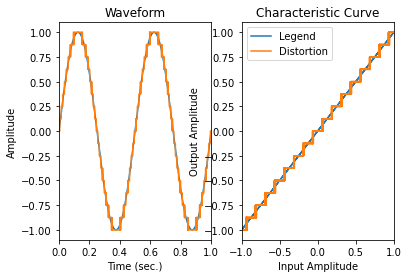

In [49]:
# DISTORTIONEXAMPLE
# This script is used to test various distortion functions. Each algorithm
# can be analyzed by 'uncommenting' the code under each section. The waveform
# and characteristic curve is plotted for each function.

Fs = 48000
Ts = 1/Fs
f = 2
t = np.arange(0, Fs * 1) * Ts

x = np.sin(2 * np.pi * f * t) # used as input signal for each distortion

# # Infinite clipping
# y = infiniteClip(x)

# # Half-wave rectification
# y = halfWaveRectification(x)

# # Full-wave Rectification
# y = fullWaveRectification(x)

# # Hard-clipping
# thresh = 0.5
# y = hardClipping(x, thresh)

# # Cubic soft-clipping
# a = 1
# y = cubicDistortion(x, alpha)

# # Arctangent distortion
# alpha = 5
# y = arctanDistortion(x, alpha)

# # Sine distortion
# y = np.sin((np.pi/2) * x)

# # Exponential soft-clipping
# drive = 4
# y = exponential(x, drive)

# # Piece-wise overdrive
# y = piecewise(x)

# # Diode clipping
# y = diode(x)

# # Asymmetrical distortion
# dc = -0.25
# y = asymmetrical(x, dc)

# # Bit crushing
# nBits = 8
# y = bitReduction(x, nBits)

# Dither Noise
dither = 0.003 * np.random.randn(np.size(x))
nBits = 4
y = bitReduction(x + dither, nBits)

# Plotting
plt.figure(1)
plt.subplot(1,2,1) # Waveform
plt.plot(t, x, t, y)
plt.axis([0, 1, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Waveform')

plt.subplot(1,2,2) # Characteristic Curve
plt.plot(x, x, x, y)
plt.axis([-1, 1, -1.1, 1.1])
plt.xlabel('Input Amplitude')
plt.ylabel('Output Amplitude')
plt.legend(['Legend', 'Distortion'])
plt.title('Characteristic Curve')
plt.show()

In [52]:
# PARALLEL DISTORTION
# This script demonstrates how to create parallel distortion. It allows for the
# 'dry' unprocessed signal to be blended with the 'wet' processed signal.
#
# See also ARCTANDISTORTION

[x, Fs] = soundfile.read('sw20.wav')

# Alpha - amount of distortion
alpha = 8

# Wet path - distortion
dist = arctanDistortion(x, alpha)

# Pick an arbitrary 'wet/dry mix' value
mix = 50 # Experiment with values from 0-100

# Convert to a linear gain value
g = mix/100

# Add together 'wet/dry' signals
y = g * dist + (1 - g) * x

# Listen to result
Audio(y, rate=Fs)